# ** Employee Turnover Modelling Capstone project

## Plan Stage


### Package importing

In [1]:
### For data manipulation
import numpy as np
import pandas as pd

### For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

### For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

### For saving models
import pickle

### Loading the dataset

In [2]:
df0 = pd.read_csv("HR_capstone_dataset.csv")
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration (Initial EDA and data cleaning)

- Understanding variables
- Clean the dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Renaming columns

standardizing the column names in line with coding best practices

In [5]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'}) 
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Checking for missing values

In [7]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Checking for duplicates

In [8]:
df0.duplicated().sum()

3008

In [9]:
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


How likely is that two employees reported exactly same values for 10 variables?
For the purpose of capstone project I will drop the duplicates as illegitimate records, but in production environment I would first perform likelihood analysis and then decide whether to drop duplicates or investigate further. 

In [10]:
df1 = df0.drop_duplicates(keep='first')
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Checking for outliers

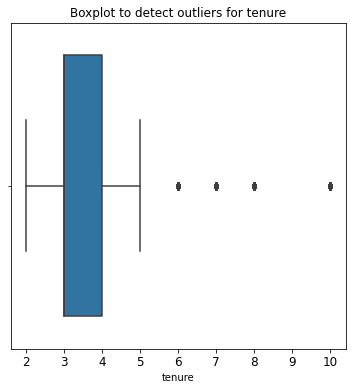

In [11]:
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

Judging by the Boxplot there are severe outliers in the upper bound for the tenure (time_spend_company) variable.
Investigating further.

In [12]:
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))
df1['tenure'].describe()

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


count    11991.000000
mean         3.364857
std          1.330240
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: tenure, dtype: float64

Depending on the type of model, I will decide to either remove or keep the outliers.

# pAce: Analyze Stage
- Analysis of relationships between variables



## Data Exploration (Continue EDA)

Starting with how many employees left and what percentage of all employees this figure represents.

In [13]:
print(df1['left'].value_counts())
print()
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


Since the percent share of minority group is above 5%, I consider the class balanced

### Visualizations

Visual examination of variables and relationships between them

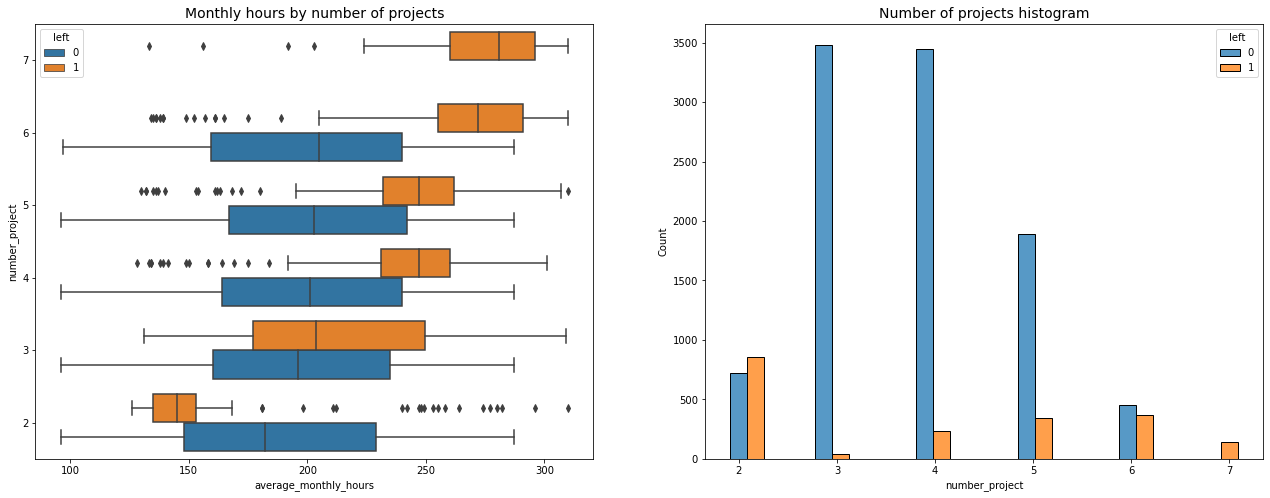

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

plt.show()

There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more

For those in group A, it's possible that they were fired. For those in group B, it's reasonable to infer that they probably quit. Gaining insight on employees in group B who contribute the most might be very usefull for the company.

7 projects seems to be final draw in quitting.

Optimal number of projects for employees to work is 3–4.

Overall, employees at Salifort Motors maybe overworked.

In [15]:
## confirming if the employees with 7 projects left
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

Examining average monthly hours with satisfaction levels

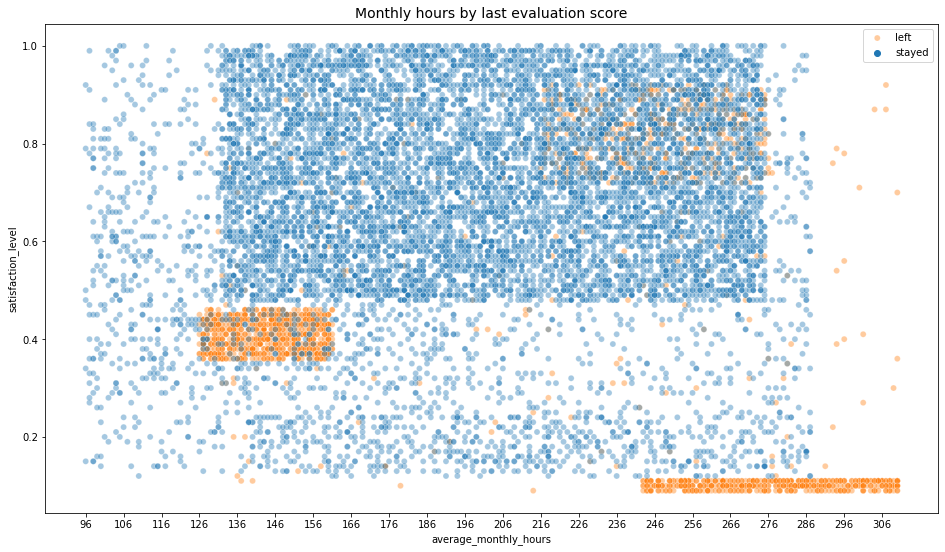

In [16]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)

##custom x-axis ticks in increments of 5
plt.xticks(np.arange(df1['average_monthly_hours'].min(), df1['average_monthly_hours'].max() + 1, 10))

plt.legend(labels=['left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14')


plt.show()

There are 3 noteworthy clusters of turnover here. 

Near the begging of X-axis we have a group of employees who have somewhat normal working hours, but low satisfaction levels(~0,4). 

Then to the right of median we have a group of employees with high satisfaction and high working hours. 

Finally, near the end of x-axis we have a group of employees with nearly 0 satisfaction and very high working hours(~240-315).

Visualizing satisfaction levels by tenure

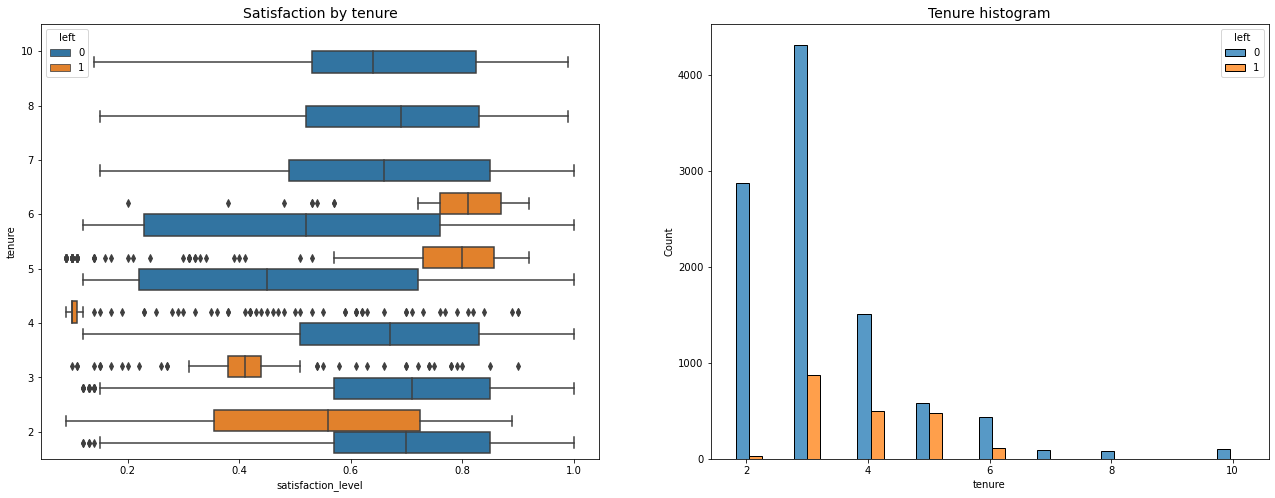

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

The highest number of employees are those who were in the company for 2, 3 and 4 years. Overall tenure groups seems to show correlation between satisfaction level and leaving the company.

In [18]:
## checking the satisfaction levels
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


Mean satisfaction level of employees who left are indeed lower than those who stayed

Investigating salary levels for different tenures.

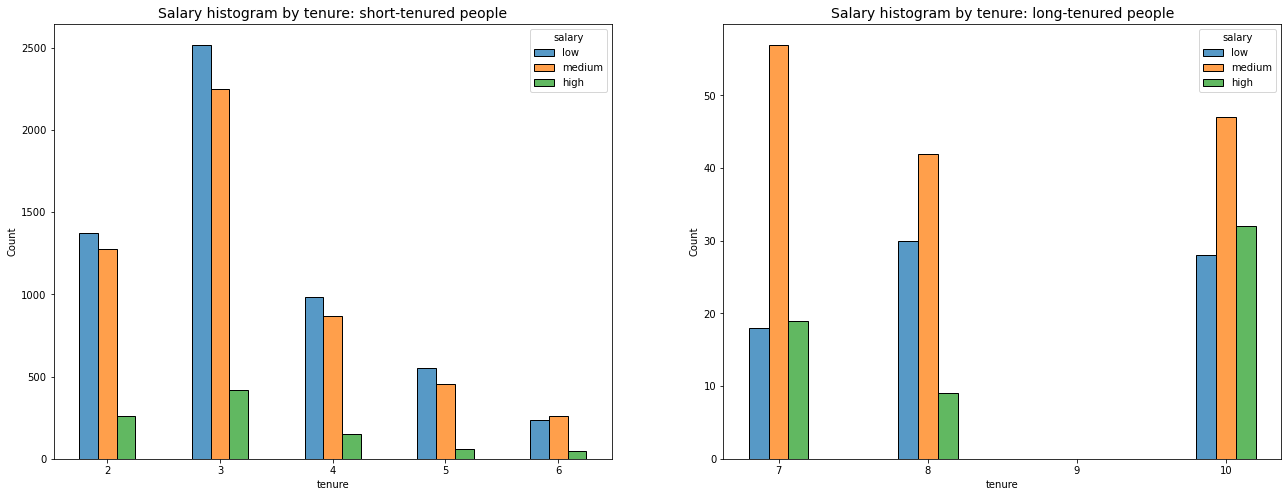

In [45]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

## using arbitrary numbers to set limit
tenure_short = df1[df1['tenure'] < 7]

tenure_long = df1[df1['tenure'] > 6]

sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=True, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', 
             shrink=.4, ax=ax[1])

## manually setting the x-axis ticks to integer values to remove continous bins of tenure
ax[1].set_xticks(np.arange(int(tenure_long['tenure'].min()), int(tenure_long['tenure'].max()) + 1, 1))

ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14')

plt.show()

As the number of tenure years increases (from 2 to 6), the overall count of employees decreases for all salary levels, with the most pronounced drop being for low-salary employees.

The decline is less sharp for medium-salary employees.

High-salary employees are rare across the short tenure, indicating that high salaries are typically not awarded early in an employee's career.

The low-salary (blue bars) employees are still present in the long tenure, but in lower numbers compared to medium-salary employees, especially in the 7- and 8-year tenure groups.

For longer tenures, there seems to be a stronger correlation between tenure and salary. As tenure increases (especially for the 7- to 10-year range), medium and high salaries become more common, which could imply that salary increases come with longer tenure.

Exploring whether there's a correlation between working long hours and receiving high evaluation scores

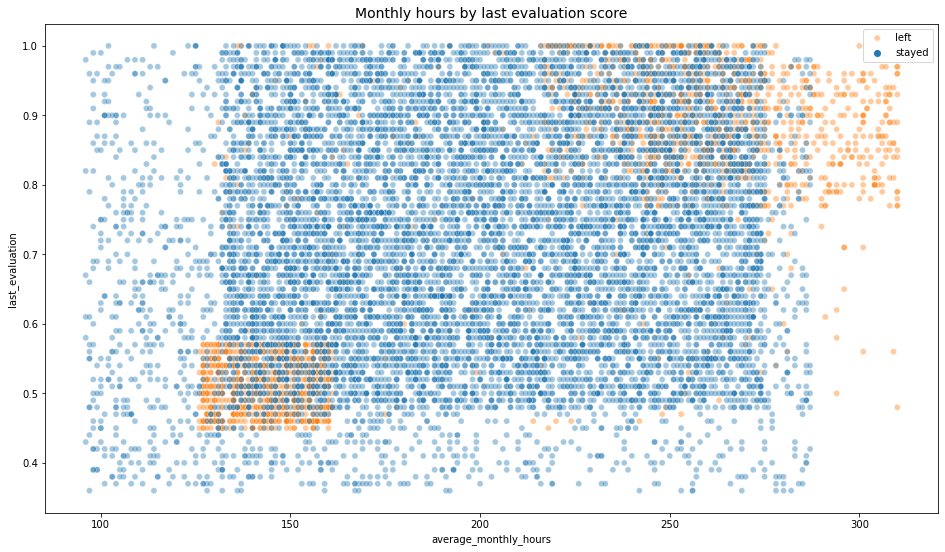

In [46]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.legend(labels=['left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

There is a cluster of employees that had long working hours and have recieved high evaluation scores, but left the company.

Then there is another cluster of employees who left, with relatively short working hours and somewhat low evaluations scores.

Most of the employees in the company work well over 167 hours per month (the standart).

Examining whether employees who worked very long hours were promoted in the last five years.

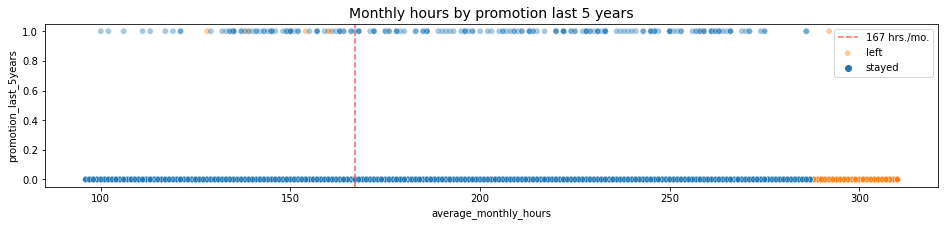

In [47]:
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)

## using the standard 167 working hours per month 
plt.axvline(x=167, color='#ff6361', ls='--')

plt.legend(labels=['167 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

Early work promotion seems to have strong effect on the employee staying in the company.
Working long hours with no promotion is most likely deciding factor in leaving the company.

Examining how the employees who left are distributed across departments.

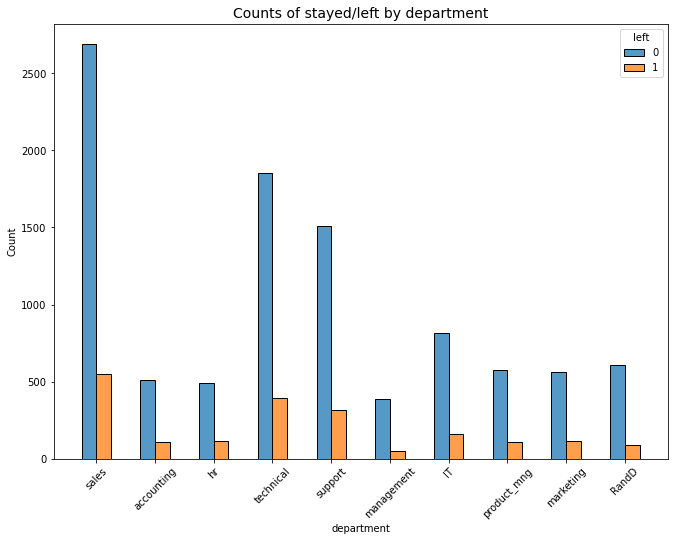

In [49]:
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);


Sales has the highest number of employees who left, but the majority of employees in this department stayed, with roughly 4-5 times more staying than leaving.

Now checking for strong correlations between variables in the orignal data.

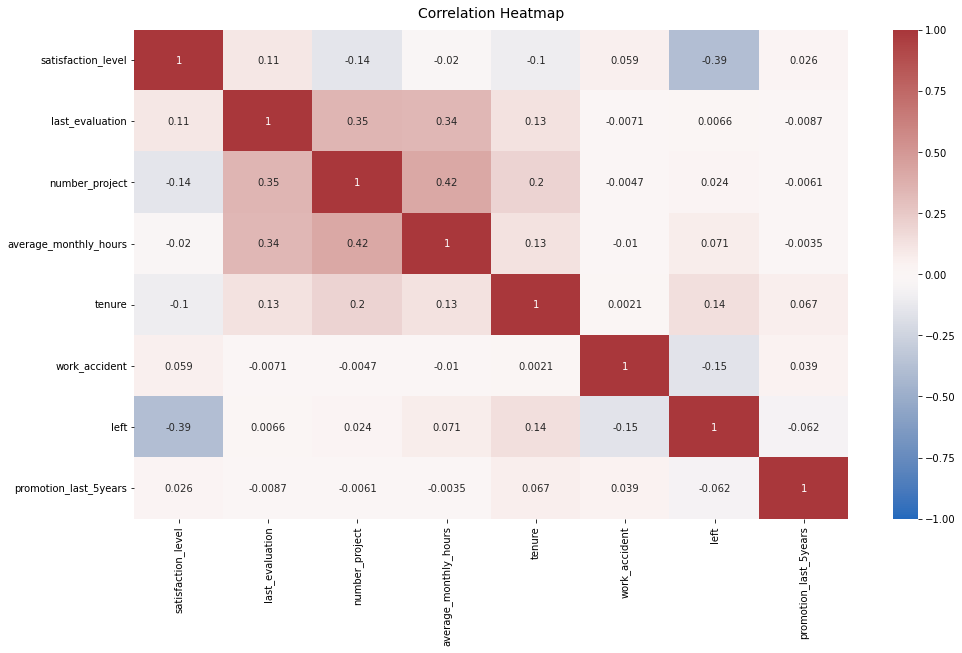

In [50]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.


### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out.

It also appears that if an employee has spent more than six years at the company, they tend not to leave

# paCe: Construct Stage
- Determining the model
- Constructing the model
- Confirming model assumptions
- Evaluating the model results


For now I decide to try logistic regression. Later on I will work on other models and compare.

**Logistic Regression model assumptions**

- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size


## Model Building, Results and Evaluation
- Fitting a model that predicts the outcome variable using two or more independent variables
- Checking the model assumptions
- Evaluating the model

The goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable left can be either 1 (indicating employee left) or 0 (indicating employee didn't leave).

### Modeling



In [51]:
### encoding for logistic regression
df_enc = df1.copy()

## Converting to numeric category because salary is ordinal
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

## One-Hot Encoding the rest
df_enc = pd.get_dummies(df_enc, drop_first=False)

df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


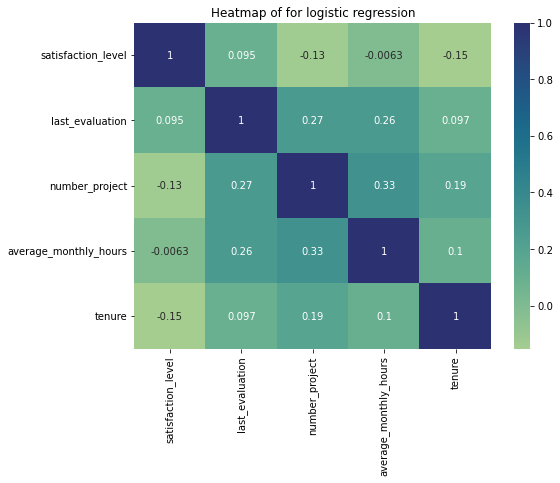

In [53]:
## heatmap of targeted variables
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of for logistic regression')
plt.show()

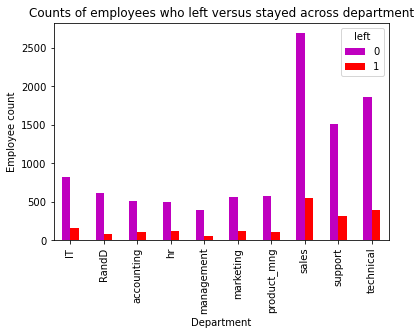

In [56]:
## comparing employees
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',color='mr') ##magenta-red
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

In [60]:
### removing outlier due to sensitivty of logistic regression
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]
df_logreg['tenure'].describe()

count    11167.000000
mean         3.109161
std          0.899277
min          2.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: tenure, dtype: float64

In [62]:
### Isolating the outcome variable
y = df_logreg['left']
y.unique()

array([1, 0])

In [63]:
### Isolating independent variables
X = df_logreg.drop('left', axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [64]:
### test data splitting
## using stratify on outcome variable to presevre class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [66]:
## fitting the logistic Regression
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [67]:
## testing the model
y_pred = log_clf.predict(X_test)

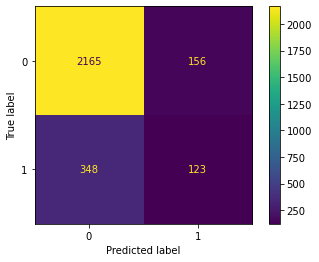

In [71]:
## visualizing the results of the Logistic Regression
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)
log_disp.plot(values_format='d')

plt.show()

In [72]:
## re-checking the class balance before interpreting the results
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

The class still can be considered balanced (minority group is above 5%)

In [73]:
## classification report on Logistic Regression
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report (with random_state=42) shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. 

However, the model does not perform well in predicting the employees who would leave.

I plan to explore alternative modelling approaches...

# PART-2 coming soon